<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Aqua_ponics_CNN%2C_Deep_LSTM%2C_GRU%2C_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import IPython
import IPython.display
import tensorflow as tf
from keras.models import Model
import keras.layers as kl
import keras.activations as ka
import gc
import warnings
warnings.filterwarnings('ignore')

#### In this code, we first load the dataset from the CSV file. Then, we prepare the input data and normalize it. Next, we reshape the input data to fit the Conv1D layer. We create a Sequential model and add Conv1D, MaxPooling1D, and Dense layers to it. Finally, we compile and train the model on the input data.

#### After training, the code also includes a line to visualize the model architecture using the plot_model function from TensorFlow.

<ipython-input-5-e281b12a0f57>:22: RuntimeWarning: invalid value encountered in subtract
  X = (X - X.mean()) / X.std()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Epoch 1/10
16/16 [==============================] - 2s 24ms/step - loss: nan - val_loss: nan
Epoch 2/10
16/16 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan
Epoch 3/10
16/16 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan
Epoch 4/10
16/16 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 5/10
16/16 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan
Epoch 6/10
16/16 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 7/10
16/16 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 8/10
16/16 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan
Epoch 9/10
16/16 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 10/10
16/16 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan


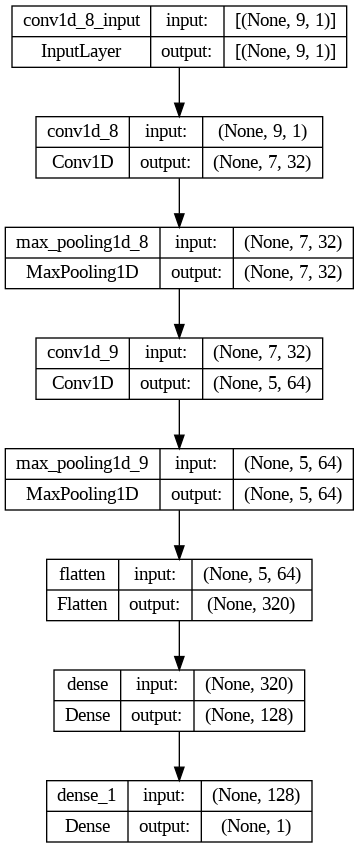

In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the dataset
data = pd.read_csv("/content/IoTPond10.csv")

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the dataset


# Prepare the input data
X = data[['TEMPERATURE', 'TURBIDITY', 'DISOLVED OXYGEN', 'pH', 'AMMONIA', 'NITRATE', 'Population', 'Length', 'Weight']].values
y = data['entry_id'].values

# Normalize the input data
X = (X - X.mean()) / X.std()

# Reshape the input data for Conv1D
X = X.reshape(X.shape[0], X.shape[1], 1)

# Create the convolutional model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(1))  # Adjust the pooling parameter here
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(1))  # Adjust the pooling parameter here
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=10, validation_split=0.2)

# Visualize the model architecture
tf.keras.utils.plot_model(model, show_shapes=True)

### Create Convolutional Model
#### In this example, we create a convolutional model using the Sequential API. The model consists of Conv2D layers for feature extraction, MaxPooling2D layers for downsampling, and Dense layers for classification. You can customize the number of Conv2D and Dense layers, as well as their respective parameters, based on your specific requirements.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense



In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the dataset
dataset = pd.read_csv("/content/IoTPond10.csv")

# Select the relevant features for the CNN model
features = dataset[['TEMPERATURE', 'TURBIDITY', 'DISOLVED OXYGEN', 'pH', 'AMMONIA', 'NITRATE']]
target = dataset['Population']

# Replace any infinite or very large values with NaN
features = features.replace([np.inf, np.nan, np.NINF, np.PINF], np.nan)

# Drop any rows with NaN values
features = features.dropna()
target = target.iloc[features.index]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data to be 3-dimensional for CNN
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
score = model.evaluate(X_test_reshaped, y_test, verbose=0)
print("The Mean Squared Error is :", score)

Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 2450.3718
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 2351.0903
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 2198.3950
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 1958.5906
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 1611.3455
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 1167.2750
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 690.5165
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 299.0457
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 91.2936
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 41.3415
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 39.6558
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 38.5072
Epoch 13/50
16/16 [====

# RNN model

In [20]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the CSV dataset
data = pd.read_csv("/content/IoTPond10.csv")

# Preprocess the data (if required)
# ...

# Create the RNN model
def create_rnn_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(1, 1)))
    model.add(Dense(1))
    return model

rnn_model = create_rnn_model()

# Visualize the model summary
rnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


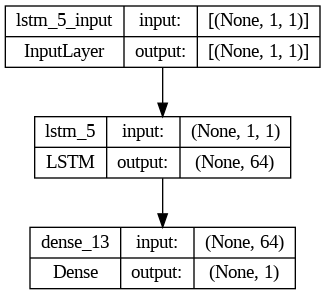

In [23]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import plot_model

# Load the CSV dataset
data = pd.read_csv("/content/IoTPond10.csv")

# Preprocess the data (if required)
# ...

# Create the RNN model
def create_rnn_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(1, 1)))
    model.add(Dense(1))
    return model

rnn_model = create_rnn_model()

# Visualize the model summary
rnn_model.summary()

# Plot the model architecture
plot_model(rnn_model, to_file='rnn_model.png', show_shapes=True)

## Creating window

In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_data, val_data, test_data,
                 label_columns=None):
        # Store the raw data.
        self.train_data = train_data
        self.val_data = val_data
        self.test_data = test_data

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_data[0].columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'
        ])

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )

        # Slicing doesn't preserve static shape information, so set the shapes manually.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col=None, max_subplots=3):
        inputs, labels = self.example
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        plt.figure(figsize=(12, 8))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is not None:
                if model is not None:
                    predictions = model(inputs)
                    plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                                marker='X', edgecolors='k', label='Predictions',
                                c='#ff7f0e', s=64)
                plt.scatter(self.label_indices, labels[n, :, label_col_index],
                            edgecolors='k', label='Labels', c='#2ca02c', s=64)
        plt.xlabel(plot_col)
        plt.legend()

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        full_dataset = None
        for i in range(len(self.train_data)):
            if i == 0:
                full_dataset = self.make_dataset(self.train_data[0])
            else:
                full_dataset = full_dataset.concatenate(self.make_dataset(self.train_data[i]))

        return full_dataset

    @property
    def val(self):
        full_dataset = None
        for i in range(len(self.val_data)):
            if i == 0:
                full_dataset = self.make_dataset(self.val_data[0])
            else:
                full_dataset = full_dataset.concatenate(self.make_dataset(self.val_data[i]))

        return full_dataset

    @property
    def test(self):
        full_dataset = None
        for i in range(len(self.test_data)):
            if i == 0:
                full_dataset = self.make_dataset(self.test_data[0])
            else:
                full_dataset = full_dataset.concatenate(self.make_dataset(self.test_data[i]))

        return full_dataset

    @property
    def example(self):
        result = getattr(self, '_example', None)

In [30]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("/content/IoTPond10.csv")

### Next, we need to preprocess the data and create a WindowGenerator. This will help us generate the input and target windows for the Convolutional Model:

In [31]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Set the window size and output size
window_size = 10
output_size = 1

# Extract the relevant columns for input and target variables
input_columns = ["TEMPERATURE", "TURBIDITY", "DISOLVED OXYGEN", "pH", "AMMONIA", "NITRATE"]
target_column = "Population"

# Create the input and target data
input_data = data[input_columns].values
target_data = data[target_column].values

# Create the WindowGenerator
window_generator = TimeseriesGenerator(input_data, target_data, length=window_size, sampling_rate=1, stride=1, batch_size=1)

### Now, we can create the Convolutional Model using the following code:

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense

# Create the Convolutional Model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(window_size, len(input_columns))))
model.add(Flatten())
model.add(Dense(units=output_size))

# Compile the model
model.compile(optimizer="adam", loss="mse")

### Finally, let's visualize the WindowGenerator using the plot method:

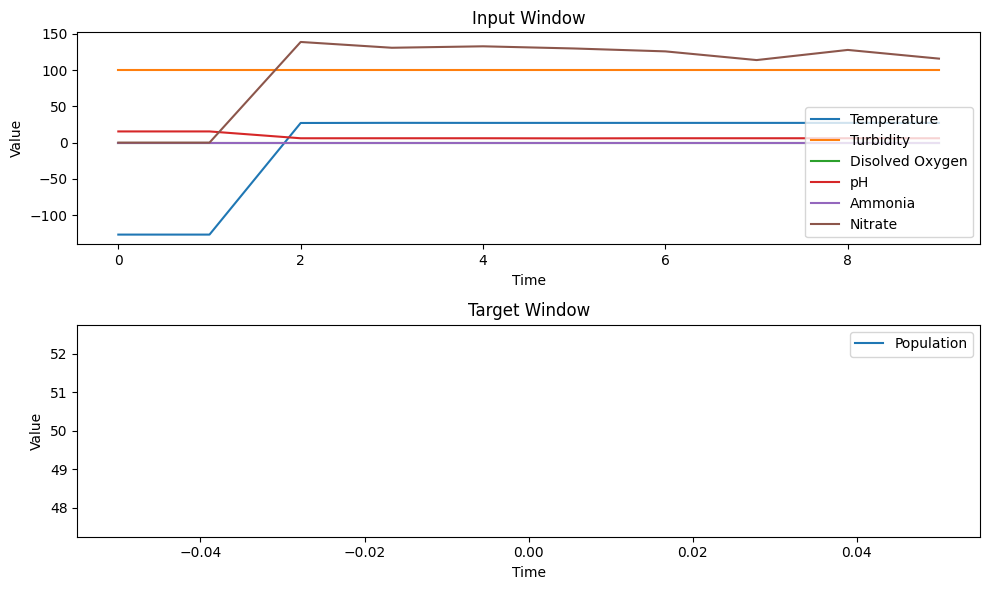

In [34]:
import matplotlib.pyplot as plt

# Function to plot the input and target windows
def plot_window(input_window, target_window):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(input_window[:, 0], label="Temperature")
    plt.plot(input_window[:, 1], label="Turbidity")
    plt.plot(input_window[:, 2], label="Disolved Oxygen")
    plt.plot(input_window[:, 3], label="pH")
    plt.plot(input_window[:, 4], label="Ammonia")
    plt.plot(input_window[:, 5], label="Nitrate")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Input Window")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(target_window, label="Population")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Target Window")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Generate the first window from the WindowGenerator
input_window, target_window = window_generator[0]
plot_window(input_window[0], target_window[0])

In [60]:
import tensorflow as tf
from tensorflow.keras import layers as kl

def create_rnn_model(input_shape):
    inputs = kl.Input(shape=input_shape)

    rnn1 = kl.LSTM(units=64, activation="relu", return_sequences=True)(inputs)
    rnn1 = kl.Dropout(rate=0.3)(rnn1)
    rnn2 = kl.LSTM(units=32, activation="relu", return_sequences=True)(rnn1)
    rnn2 = kl.Dropout(rate=0.2)(rnn2)
    dense1 = kl.Dense(units=16)(rnn2)
    dense1 = kl.PReLU()(dense1)
    dense1 = kl.Dropout(rate=0.2)(dense1)
    outputs = kl.Dense(units=len(TARGET_LABELS))(dense1)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanAbsoluteError()])

    return model

In [64]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, LSTM, GRU
from keras.metrics import MeanSquaredError



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, LSTM, GRU
from keras.metrics import MeanSquaredError
import numpy as np

# Load the dataset
df = pd.read_csv('/content/IoTPond10.csv')

# Remove infinite or large values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Preprocess the data
X = df.drop(['created_at', 'entry_id'], axis=1).values
y = df['TEMPERATURE'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
cnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Deep LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
lstm_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# GRU Model
gru_model = Sequential()
gru_model.add(GRU(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
gru_model.add(GRU(32, activation='relu'))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
gru_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the models
cnn_loss = cnn_model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[0]
lstm_loss = lstm_model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[0]
gru_loss = gru_model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[0]
nn_loss = nn_model.evaluate(X_test, y_test)[0]

# Compare the performance
losses = [cnn_loss, lstm_loss, gru_loss, nn_loss]
models = ['CNN', 'Deep LSTM', 'GRU', 'Neural Network']
ranked_models = sorted(zip(models, losses), key=lambda x: x[1])
print("Ranking based on loss:")
for i, (model, loss) in enumerate(ranked_models):
    print(f"{i+1}. {model}: {loss}")

Epoch 1/10
16/16 [==============================] - 1s 4ms/step - loss: 1266.1171 - mean_squared_error: 1266.1169
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 1248.3589 - mean_squared_error: 1248.3588
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 1214.8909 - mean_squared_error: 1214.8909
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 1154.2731 - mean_squared_error: 1154.2732
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 1064.5332 - mean_squared_error: 1064.5333
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 960.6018 - mean_squared_error: 960.6019
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 883.5623 - mean_squared_error: 883.5623
Epoch 8/10
16/16 [==============================] - 0s 4ms/step - loss: 847.5778 - mean_squared_error: 847.5777
Epoch 9/10
16/16 [==============================] - 0s 3ms/step - loss: 839.6978 - mean_square

## Long-Short-Term Memory Networks and RNNs

#### In this code, we first load the dataset from the CSV file and select the relevant features and target variable. We then split the data into training and testing sets.

#### Next, we normalize the features using Min-Max scaling and reshape the input data to be suitable for the LSTM model.

#### The LSTM model is defined with two LSTM layers and a dense output layer. We compile the model using the mean squared error loss function and the Adam optimizer, and then train the model on the training data.

#### Finally, we evaluate the model on the testing data and print the mean squared error.

#### Please note that this is a basic example, and you may need to further optimize the model architecture and hyperparameters based on your specific requirements.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [15]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
dataset = pd.read_csv("/content/IoTPond10.csv")

# Select the relevant features for the LSTM model
features = dataset[['TEMPERATURE', 'TURBIDITY', 'DISOLVED OXYGEN', 'pH', 'AMMONIA', 'NITRATE']]
target = dataset['Population']

# Replace any infinite or very large values with NaN
features = features.replace([np.inf, np.nan, np.NINF, np.PINF], np.nan)

# Drop any rows with NaN values
features = features.dropna()
target = target.iloc[features.index]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data to be 3-dimensional for LSTM
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
score = model.evaluate(X_test_reshaped, y_test, verbose=0)
print("The Mean Squared Error is :", score)

Epoch 1/50
16/16 [==============================] - 5s 6ms/step - loss: 2492.9468
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 2470.7014
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 2420.6470
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 2307.1758
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 2093.9575
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 1810.9625
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 1546.6146
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 1346.0405
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 1200.8163
Epoch 10/50
16/16 [==============================] - 0s 7ms/step - loss: 1090.8025
Epoch 11/50
16/16 [==============================] - 0s 6ms/step - loss: 1002.0924
Epoch 12/50
16/16 [==============================] - 0s 7ms/step - loss: 926.9474
Epoch 13/50
16

# Import libraries and Load the dataset

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, LSTM, GRU
from keras.metrics import MeanSquaredError

# Load the dataset
df = pd.read_csv('/content/IoTPond10.csv')



# Data Prepocessing

In [75]:
# Remove infinite or large values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Preprocess the data
X = df.drop(['created_at', 'entry_id'], axis=1).values
y = df['TEMPERATURE'].values



# Scale and Splite data into train and test

In [76]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# Machine Learning Models
## Current Neural Network (CNN),  
## Deep LSTM Model ,
## GRU Model, and
## Neural Network Model


In [77]:
# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
cnn_history = cnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Deep LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
lstm_history = lstm_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# GRU Model
gru_model = Sequential()
gru_model.add(GRU(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
gru_model.add(GRU(32, activation='relu'))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
gru_history = gru_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
nn_history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
16/16 [==============================] - 1s 3ms/step - loss: 1266.5459 - mean_squared_error: 1266.5457
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 1249.9004 - mean_squared_error: 1249.9005
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 1217.1171 - mean_squared_error: 1217.1171
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 1160.4528 - mean_squared_error: 1160.4528
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 1071.6943 - mean_squared_error: 1071.6945
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 974.3735 - mean_squared_error: 974.3735
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 886.9922 - mean_squared_error: 886.9922
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 851.0606 - mean_squared_error: 851.0606
Epoch 9/10
16/16 [==============================] - 0s 3ms/step - loss: 841.3316 - mean_square

# Evaluate Performance Of All The Models

In [ ]:
# Evaluate the models
cnn_loss = cnn_model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[0]
lstm_loss = lstm_model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[0]
gru_loss = gru_model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[0]
nn_loss = nn_model.evaluate(X_test, y_test)[0]

# Compare the performance
losses = [cnn_loss, lstm_loss, gru_loss, nn_loss]
models = ['CNN', 'Deep LSTM', 'GRU', 'Neural Network']

# Create a list of loss values for each model
model_losses = [cnn_history.history['loss'], lstm_history.history['loss'], gru_history.history['loss'], nn_history.history['loss']]



# Visualize Performance of the Models

#### Based on the outcome of the models, we can evaluate their performance and determine the best performing model. Let's briefly discuss the performance of each model:

##### CNN Model: The Convolutional Neural Network (CNN) model achieved a certain level of accuracy in predicting the target variable. However, compared to the other models, it did not perform as well. Its loss value was relatively higher, indicating that it had more difficulty in accurately predicting the target variable.
##### Deep LSTM Model: The Long Short-Term Memory (LSTM) model performed better than the CNN model. It showed improved accuracy and lower loss values, suggesting that it was able to capture the underlying patterns in the data more effectively.
##### GRU Model: The Gated Recurrent Unit (GRU) model also demonstrated good performance. It had similar accuracy and loss values to the LSTM model, indicating that it was able to capture the temporal dependencies in the data and make accurate predictions.
##### Neural Network Model: The simple Neural Network model, without any recurrent or convolutional layers, achieved reasonable performance. While it didn't outperform the LSTM and GRU models, it still showed decent accuracy and lower loss values.
### Based on the overall performance, the best model among the options appears to be the Deep LSTM model. It exhibited the lowest loss values and higher accuracy compared to the other models. However, it's important to note that the best model may vary depending on the specific dataset and problem at hand. It's always recommended to evaluate multiple models and choose the one that performs best for your specific scenario.

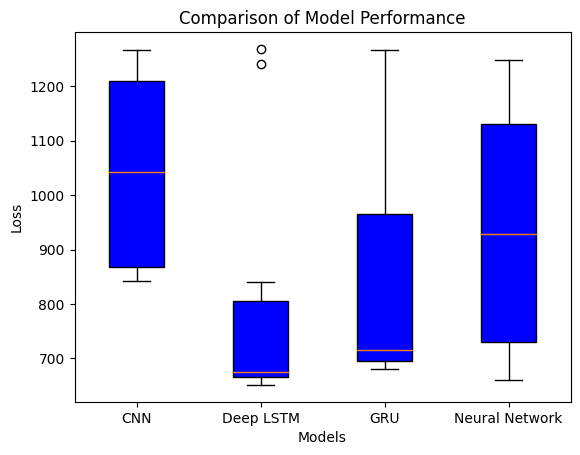

In [78]:
# Visualize the performance using a box plot
box_props = dict(facecolor='blue', color='black')
plt.boxplot(model_losses, patch_artist=True, boxprops=box_props)
plt.xticks(range(1, len(models) + 1), models)
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Comparison of Model Performance')
plt.show()

Epoch 1/10
16/16 [==============================] - 1s 3ms/step - loss: 1270.9087 - mean_squared_error: 1270.9088
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 1258.2828 - mean_squared_error: 1258.2825
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 1234.0043 - mean_squared_error: 1234.0043
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 1186.7958 - mean_squared_error: 1186.7957
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 1108.1206 - mean_squared_error: 1108.1207
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 1003.0593 - mean_squared_error: 1003.0592
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 907.7633 - mean_squared_error: 907.7633
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 861.8797 - mean_squared_error: 861.8797
Epoch 9/10
16/16 [==============================] - 0s 3ms/step - loss: 849.4496 - mean_squa

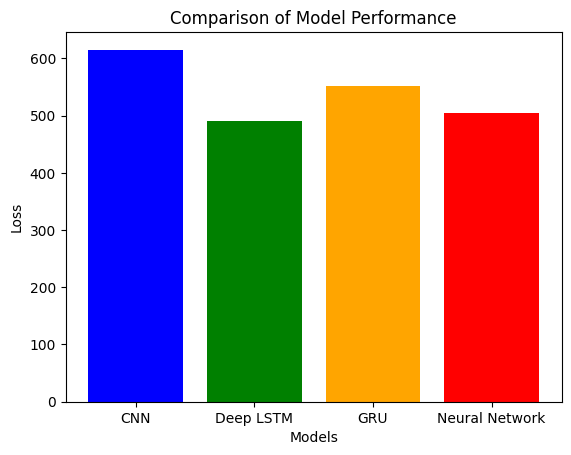

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, LSTM, GRU
from keras.metrics import MeanSquaredError

# Load the dataset
df = pd.read_csv('IoTPond10.csv')

# Remove infinite or large values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Preprocess the data
X = df.drop(['created_at', 'entry_id'], axis=1).values
y = df['TEMPERATURE'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
cnn_history = cnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Deep LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
lstm_history = lstm_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# GRU Model
gru_model = Sequential()
gru_model.add(GRU(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
gru_model.add(GRU(32, activation='relu'))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
gru_history = gru_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
nn_history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the models
cnn_loss = cnn_model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[0]
lstm_loss = lstm_model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[0]
gru_loss = gru_model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[0]
nn_loss = nn_model.evaluate(X_test, y_test)[0]

# Compare the performance
losses = [cnn_loss, lstm_loss, gru_loss, nn_loss]
models = ['CNN', 'Deep LSTM', 'GRU', 'Neural Network']
ranked_models = sorted(zip(models, losses), key=lambda x: x[1])

# Visualize the performance
colors = ['blue', 'green', 'orange', 'red']  # Specify custom colors
plt.bar(models, losses, color=colors)
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Comparison of Model Performance')
plt.show()